**Problem1-Leetcode#743. Network Delay Time-Medium**

You are given a network of n nodes, labeled from 1 to n.\
You are also given times, a list of travel times as directed edges times[i] = (ui, vi, wi),\
where ui is the source node, vi is the target node,\
and wi is the time it takes for a signal to travel from source to target.

We will send a signal from a given node k. Return the minimum time it takes\
for all the n nodes to receive the signal. If it is impossible for all the n nodes\
to receive the signal, return -1.

- Example 1:

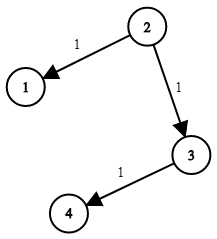

    - Input: times = [[2,1,1],[2,3,1],[3,4,1]], n = 4, k = 2
    - Output: 2
- Example 2:

    - Input: times = [[1,2,1]], n = 2, k = 1
    - Output: 1
- Example 3:

    - Input: times = [[1,2,1]], n = 2, k = 2
    - Output: -1
 



In [ ]:
class Solution:
    def networkDelayTime(self, times: List[List[int]], n: int, k: int) -> int:
        adj = defaultdict(list)
        for u, v, w in times:
            adj[u].append((v, w))

        shortest = {}

        minHeap = [(0, k)]

        while minHeap:
            curr_time, node = heapq.heappop(minHeap)

            if node in shortest:
                continue

            shortest[node] = curr_time

            for neighbor, time in adj[node]:
                if neighbor not in shortest:
                    heapq.heappush(minHeap, (curr_time + time, neighbor))

        if len(shortest) == n:
            return max(shortest.values())
        else:
            return -1


**Problem2-Leetcode#778. Swim in Rising Water-Hard**

You are given an n x n integer matrix grid where each value grid[i][j]\
represents the elevation at that point (i, j).

The rain starts to fall. At time t, the depth of the water everywhere is t.\
You can swim from a square to another 4-directionally adjacent square if and\
only if the elevation of both squares individually are at most t.\
You can swim infinite distances in zero time. Of course,\
you must stay within the boundaries of the grid during your swim.

Return the least time until you can reach the bottom right square (n - 1, n - 1)\
if you start at the top left square (0, 0).


- Example 1:

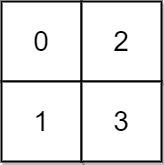

    - Input: grid = [[0,2],[1,3]]
    - Output: 3
    - Explanation:
        At time 0, you are in grid location (0, 0).\
        You cannot go anywhere else because 4-directionally adjacent neighbors\
        have a higher elevation than t = 0.\
        You cannot reach point (1, 1) until time 3.\
        When the depth of water is 3, we can swim anywhere inside the grid.
        
- Example 2:

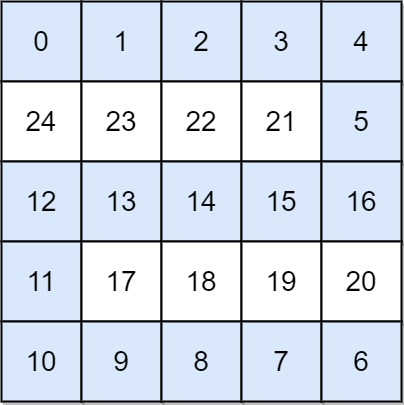

    - Input: 
        grid = \
        [[0,1,2,3,4],\
        [24,23,22,21,5],\
        [12,13,14,15,16],\
        [11,17,18,19,20],\
        [10,9,8,7,6]]
    - Output: 16
    - Explanation: The final route is shown.\
        We need to wait until time 16 so that (0, 0) and (4, 4) are connected.

- Constraints:

    - n == grid.length
    - n == grid[i].length
    - 1 <= n <= 50
    - 0 <= grid[i][j] < n2
    - Each value grid[i][j] is unique.

In [ ]:
class Solution:
    def swimInWater(self, grid: List[List[int]]) -> int:
        n = len(grid)

        minHeap = [(grid[0][0], 0, 0)]

        time = [[float('inf')] * n for _ in range(n)]
        time[0][0] = grid[0][0]

        directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]

        while minHeap:
            curr_time, x, y = heapq.heappop(minHeap)

            if x == n - 1 and y == n - 1:
                return curr_time

            for dx, dy in directions:
                nx, ny = x + dx, y + dy

                if 0 <= nx < n and 0 <= ny < n:

                    new_time = max(curr_time, grid[nx][ny])


                    if new_time < time[nx][ny]:
                        time[nx][ny] = new_time
                        heapq.heappush(minHeap, (new_time, nx, ny))

        return -1


**Problem3-Leetcode#1514. Path with Maximum Probability-Medium**
You are given an undirected weighted graph of n nodes (0-indexed),\
represented by an edge list where edges[i] = [a, b] is an undirected\
edge connecting the nodes a and b with a probability of success of traversing that edge succProb[i].

Given two nodes start and end, find the path with the maximum probability of\
success to go from start to end and return its success probability.

If there is no path from start to end, return 0. Your answer will be accepted\
if it differs from the correct answer by at most 1e-5.


- Example 1:

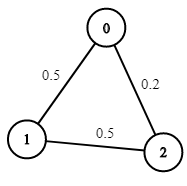

    - Input: n = 3, \
        edges = [[0,1],[1,2],[0,2]],\
        succProb = [0.5,0.5,0.2],\
        start = 0, end = 2
    - Output: 0.25000
    - Explanation: There are two paths from start to end, one having\
        a probability of success = 0.2 and the other has 0.5 * 0.5 = 0.25.

- Example 2:

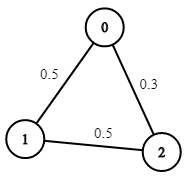

    - Input: n = 3,\
        edges = [[0,1],[1,2],[0,2]],\
        succProb = [0.5,0.5,0.3],\
        start = 0, end = 2
    - Output: 0.30000

- Example 3:
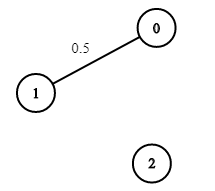
    - Input: n = 3,\ 
        edges = [[0,1]],\
        succProb = [0.5], \
        start = 0, end = 2
    - Output: 0.00000
    - Explanation: There is no path between 0 and 2.


In [ ]:
class Solution:
    def maxProbability(self, n: int, edges: List[List[int]], succProb: List[float], start_node: int, end_node: int) -> float:
        graph = defaultdict(list)
        for i, (u, v) in enumerate(edges):
            graph[u].append((v, succProb[i]))
            graph[v].append((u, succProb[i]))

        probabilities = [0.0] * n
        probabilities[start_node] = 1.0

        min_heap = [(-1.0, start_node)]

        while min_heap:
            neg_prob, current_node = heapq.heappop(min_heap)
            current_prob = -neg_prob

            if current_node == end_node:
                return current_prob

            for neighbor, edge_prob in graph[current_node]:
                new_prob = current_prob * edge_prob

                if new_prob > probabilities[neighbor]:
                    probabilities[neighbor] = new_prob
                    heapq.heappush(min_heap, (-new_prob, neighbor))

        return 0.0

**Problem4-Leetcode#1584. Min Cost to Connect All Nodes-Medium**

You are given an array points representing integer coordinates\
of some points on a 2D-plane, where points[i] = [xi, yi].

The cost of connecting two points [xi, yi] and [xj, yj] is the\
manhattan distance between them: |xi - xj| + |yi - yj|, where |val|\
denotes the absolute value of val.

Return the minimum cost to make all points connected. All points\
are connected if there is exactly one simple path between any two points.

 

- Example 1:

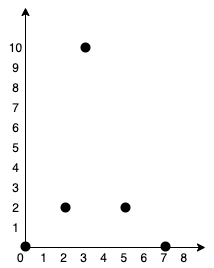

    - Input: points = [[0,0],[2,2],[3,10],[5,2],[7,0]]\
    - Output: 20\
    - Explanation: 
    
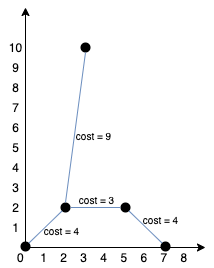    
    
 We can connect the points as shown above to get the minimum cost of 20.
Notice that there is a unique path between every pair of points.

- Example 2:

    - Input: points = [[3,12],[-2,5],[-4,1]]
    - Output: 18
   

In [ ]:
class Solution:
    def minCostConnectPoints(self, points: List[List[int]]) -> int:
        def manhattan(p1, p2):
            return abs(p1[0] - p2[0]) + abs(p1[1] - p2[1])

        def find(parent, x):
            if parent[x] != x:
                parent[x] = find(parent, parent[x])
            return parent[x]

        def union(parent, rank, x, y):
            rootX = find(parent, x)
            rootY = find(parent, y)
            if rootX != rootY:
                if rank[rootX] > rank[rootY]:
                    parent[rootY] = rootX
                elif rank[rootX] < rank[rootY]:
                    parent[rootX] = rootY
                else:
                    parent[rootY] = rootX
                    rank[rootX] += 1

        n = len(points)
        edges = []

        for i in range(n):
            for j in range(i + 1, n):
                dist = manhattan(points[i], points[j])
                edges.append((dist, i, j))

        edges.sort()

        parent = list(range(n))
        rank = [0] * n
        total_cost = 0

        for dist, u, v in edges:
            if find(parent, u) != find(parent, v):
                union(parent, rank, u, v)
                total_cost += dist

        return total_cost
